## Programming Assignment 2 - k clustering using Kruskal's algirthm

### 1 - 1) Max-spacing k-clustering

※ One helpful definition for max-spacing: "**the edge that decreases the number of clusters from k to k-1 clusters**." - from [Coursera discussion forum](https://www.coursera.org/learn/algorithms-greedy/discussions/weeks/2/threads/Ab7u37OgEem5EA4GpleJ0g)

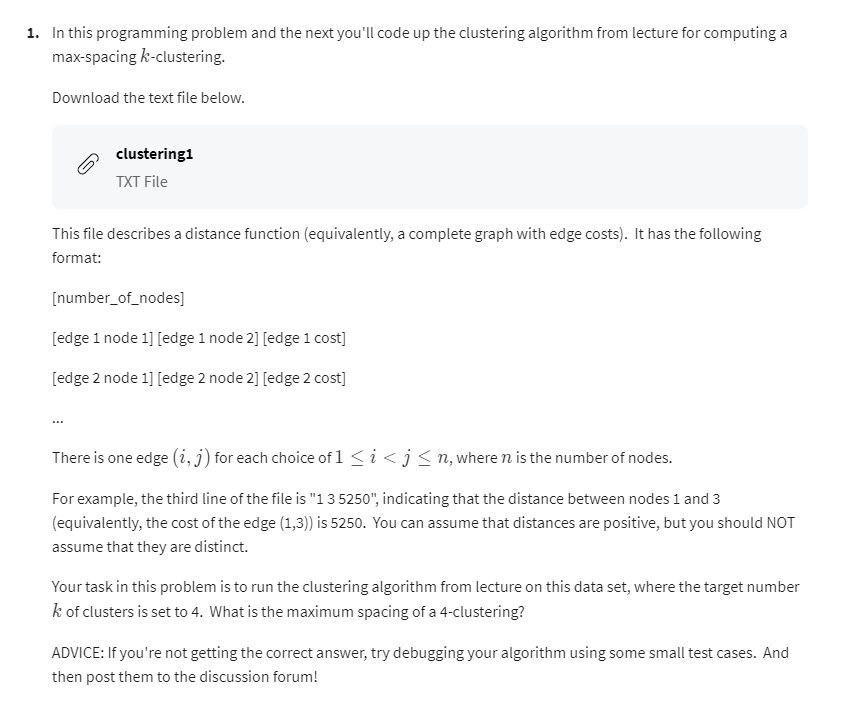

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/clustering1.txt', 'r') as f:
    numOfNodes = f.readline()

    data = f.readlines()

edges_original = list(map(lambda x: (int(x.split(' ')[2][:-1]), int(x.split(' ')[0]), int(x.split(' ')[1])  ) , data)) # (cost, node1, node2)
edges_original[:5] 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Note: #(cluster) + #(selected edge) = #(node)

In [ ]:
parent = dict()
rank = dict()
graph = {
    'vertices': [i for i in range(1, 501)],
    'edges': edges_original
}

# Initialize all vertices
def make_set(vertex):
    parent[vertex] = vertex
    rank[vertex] = 0

# Find the given vertex's head node
def find(vertex):
    if parent[vertex] != vertex:
        parent[vertex] = find(parent[vertex])
    return parent[vertex]

# Connect two vertices
def union(vertex1, vertex2):
    root1 = find(vertex1)
    root2 = find(vertex2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: 
                rank[root2] += 1

def kruskal(graph):
    minimum_spanning_tree = []

    # Initiation
    for vertex in graph['vertices']:
        make_set(vertex) # -> each vertex becomes its head vertex at the same time
        
    # Sort edges by cost
    edges = graph['edges']
    edges.sort()
    
    # Connect two vertices (not to make any cycles)
    for edge in edges:
        weight, vertex1, vertex2 = edge
        if find(vertex1) != find(vertex2):
            union(vertex1, vertex2)
            minimum_spanning_tree.append(edge)
	    
    return minimum_spanning_tree

In [ ]:
#kruskal(graph) returns the edge set for MST.
#The list is constructed one by one, which means list[-1] contains the information of the edge that makes 1-cluster
#Thus list[-4] has the information for 4-cluster.
#However, max-spacing means that the cost of edge that will be picked in the next iteration - look at the helpful definition of it above.

kruskal(graph)[-3]

(106, 414, 455)

### 1 - 2) Max-spacing k-clustering with a MUCH bigger graph

Sadly unsolvable to me right now due to the lack of understand about [bit shifting](https://www.coursera.org/learn/algorithms-greedy/discussions/weeks/2/threads/mSGCyQULEemZUwrw3z8SgA)

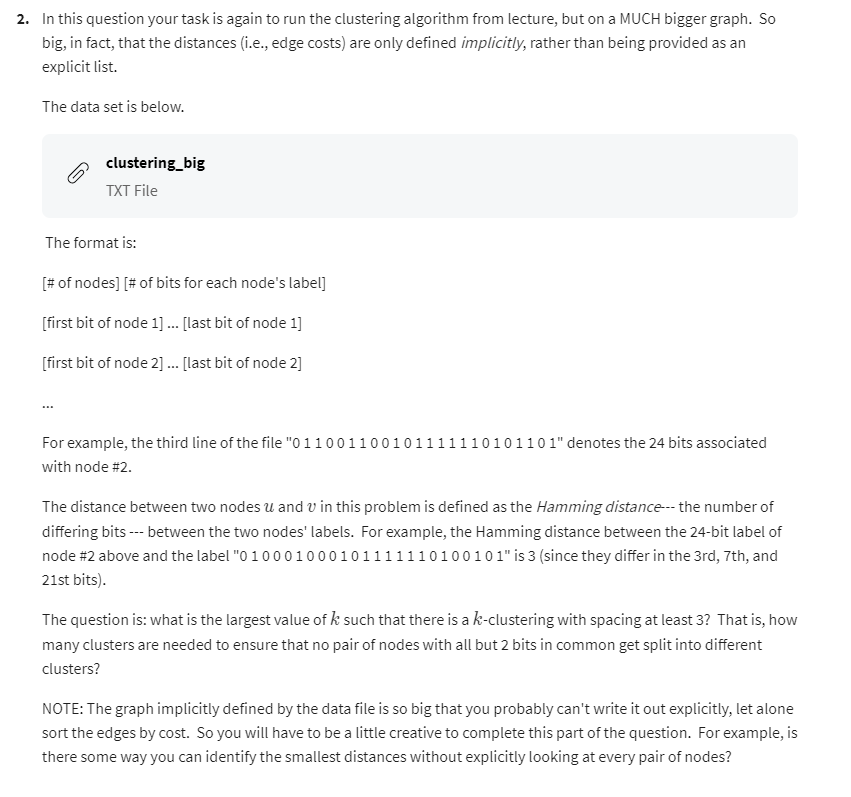

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/clustering_big.txt', 'r') as f:
    numOfNodes = f.readline()

    data = f.readlines()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
numOfNodes

'200000 24\n'

In [ ]:
nodes = list(map(lambda x : list(map(int, (x.split(' '))[:-1])), data))

In [ ]:
import numpy as np
edges = []
for i in range(200000):
  if i % 10000 == 0:
    print('...')
  for j in range(i + 1, 200000):
    edges.append( (np.sum(np.logical_xor(nodes[i], nodes[j])), i, j))

In [ ]:
np.sum(np.logical_xor([1,1,1,1,1], [1,0,1,0,1]))

2